In [85]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

#### Data Processing

In [86]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [87]:
le = LabelEncoder()

bank.job = le.fit_transform(bank.job)
bank.marital = le.fit_transform(bank.marital)
bank.education = le.fit_transform(bank.education)
bank.default = le.fit_transform(bank.default)
bank.housing = le.fit_transform(bank.housing)
bank.loan = le.fit_transform(bank.loan)
bank.contact = le.fit_transform(bank.contact)
bank.month = le.fit_transform(bank.month)
bank.poutcome = le.fit_transform(bank.poutcome)
bank.y = le.fit_transform(bank.y)

# for i in bank.columns:
#     bank[i] = le.fit_transform(bank[i])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


#### Load PCA & Split data

In [88]:
x = bank.drop(['y'], axis=1)
y = bank["y"]

pca = PCA(n_components=2)
nw_x = pca.fit_transform(x)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(nw_x, y, test_size=0.25, random_state=42)

In [90]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3390, 2) (1131, 2) (3390,) (1131,)


#### Gaussian NB Model

In [91]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_score = gnb.predict_proba(x_test)
print(y_score)
print(gnb.score(x_test, y_test))

[[0.96940375 0.03059625]
 [0.81810403 0.18189597]
 [0.9488325  0.0511675 ]
 ...
 [0.86682846 0.13317154]
 [0.72757114 0.27242886]
 [0.95116616 0.04883384]]
0.8930150309460654


In [92]:
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_score[:, 1])

#### Random Forest Model

In [93]:
rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=42)
rf.fit(x_train, y_train)
y_score_rf = rf.predict_proba(x_test)

print(f"score: {rf.score(x_test, y_test) * 100:.4f}%")

score: 88.8594%


#### ROC Curve

<Figure size 640x480 with 0 Axes>

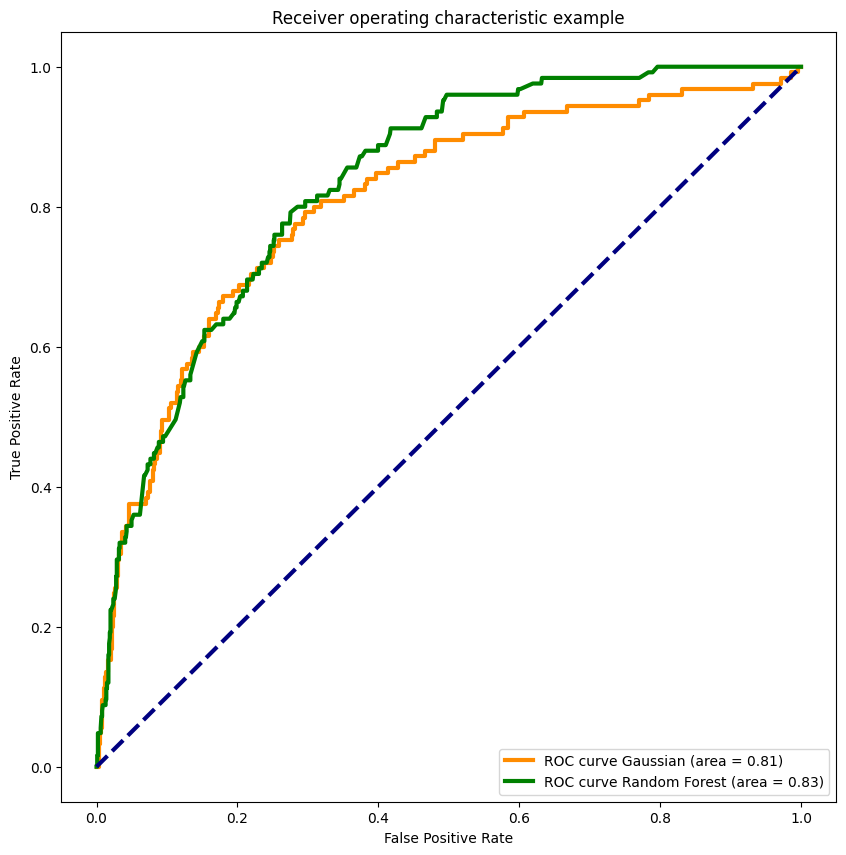

In [94]:
gfpr, gtpr, _ = roc_curve(y_test, y_score[:, 1])
cfpr, ctpr, _ = roc_curve(y_test, y_score_rf[:, 1])

roc_auc_gussian = auc(gfpr, gtpr)
roc_auc_rf = auc(cfpr, ctpr)

plt.figure()
lw = 3
plt.figure(figsize=(10, 10))

plt.plot(gfpr, gtpr, color='darkorange',lw=lw, label='ROC curve Gaussian (area = %0.2f)' % roc_auc_gussian)
plt.plot(cfpr, ctpr, color='green',lw=lw, label='ROC curve Random Forest (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

#### 2D Decision Regions

<Axes: >

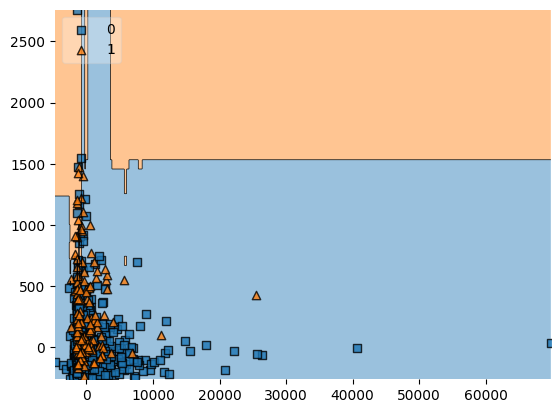

In [95]:
y_test = y_test.values

plot_decision_regions(x_test, y_test, clf = rf, legend=2)